In [1]:
%matplotlib inline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_samples 
from sklearn.cluster import hierarchical 
from sklearn.cluster import DBSCAN 
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from matplotlib import cm
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import euclidean
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as  LDA

In [2]:
X = pd.read_csv("data_1024.csv",sep='\t')

X.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


In [3]:
X = X.drop(labels=['Driver_ID'],axis=1)
X.head()

,Distance_Feature,Speeding_Feature
0,71.24,28.0
1,52.53,25.0
2,64.54,27.0
3,55.69,22.0
4,54.58,25.0


## 1)  Encontrando os clusteres com o metodo single, complete, average.

In [4]:
single = linkage(X,method='single')
pd.DataFrame(single,columns=['idx1', 'idx2', 'dist', 'sample_count']).head(10)

,idx1,idx2,dist,sample_count
0,118.0,212.0,0.0,2.0
1,989.0,3163.0,0.0,2.0
2,1055.0,1870.0,0.0,2.0
3,1190.0,1913.0,0.0,2.0
4,111.0,1650.0,0.0,2.0
5,1128.0,3038.0,0.0,2.0
6,523.0,1428.0,0.0,2.0
7,1169.0,1629.0,0.0,2.0
8,1867.0,2619.0,0.0,2.0
9,2535.0,3080.0,0.0,2.0


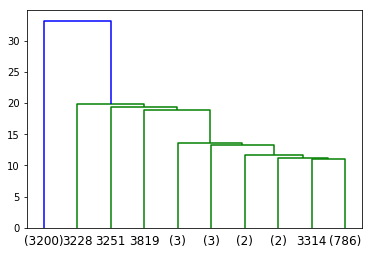

In [5]:
dendrogram(single,truncate_mode='lastp', p=10)
plt.show()

In [6]:
complete = linkage(X,method='complete')
pd.DataFrame(single,columns=['idx1', 'idx2', 'dist', 'sample_count']).head(10)

,idx1,idx2,dist,sample_count
0,118.0,212.0,0.0,2.0
1,989.0,3163.0,0.0,2.0
2,1055.0,1870.0,0.0,2.0
3,1190.0,1913.0,0.0,2.0
4,111.0,1650.0,0.0,2.0
5,1128.0,3038.0,0.0,2.0
6,523.0,1428.0,0.0,2.0
7,1169.0,1629.0,0.0,2.0
8,1867.0,2619.0,0.0,2.0
9,2535.0,3080.0,0.0,2.0


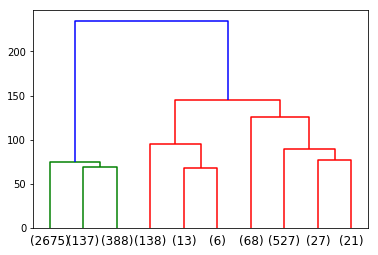

In [7]:
dendrogram(complete,truncate_mode='lastp', p=10)
plt.show()

In [8]:
average = linkage(X,method='average')
pd.DataFrame(average,columns=['idx1', 'idx2', 'dist', 'sample_count']).head(10)

,idx1,idx2,dist,sample_count
0,118.0,212.0,0.0,2.0
1,1055.0,1870.0,0.0,2.0
2,1190.0,1913.0,0.0,2.0
3,1375.0,2417.0,0.0,2.0
4,1372.0,1924.0,0.0,2.0
5,2258.0,2651.0,0.0,2.0
6,2535.0,3080.0,0.0,2.0
7,1867.0,2619.0,0.0,2.0
8,1169.0,1629.0,0.0,2.0
9,523.0,1428.0,0.0,2.0


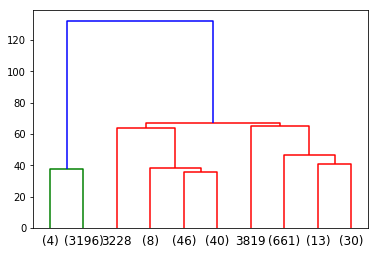

In [9]:
dendrogram(average,truncate_mode='lastp', p=10)
plt.show()

## 2) Fazendo corte no dendograma 

In [10]:
y_ = cut_tree(average, n_clusters=3)

In [11]:
y_.shape

(4000, 1)

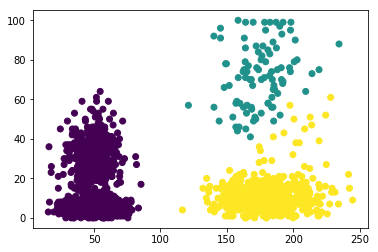

In [12]:
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=y_.reshape(4000,))

## 3) e 4) Usando DBScan

eps: 2
min_sample: 1


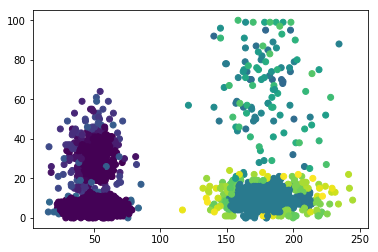

eps: 2
min_sample: 2


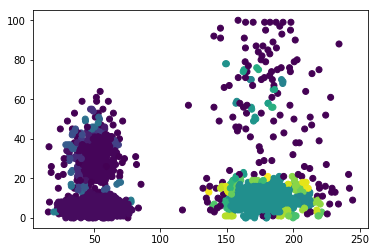

eps: 2
min_sample: 3


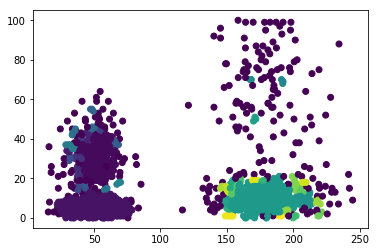

eps: 2
min_sample: 4


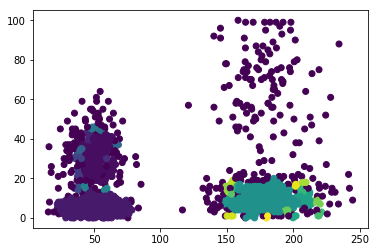

eps: 2
min_sample: 5


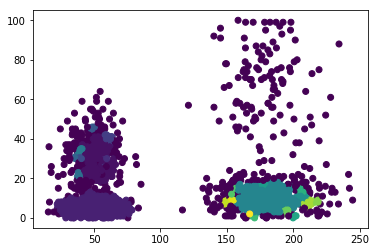

eps: 2
min_sample: 15


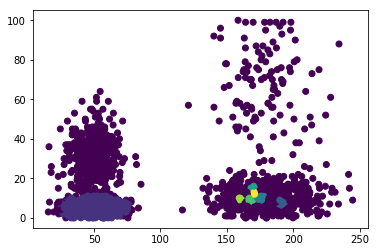

eps: 2
min_sample: 50


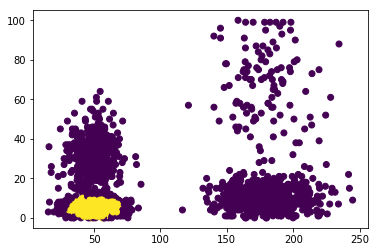

eps: 3
min_sample: 1


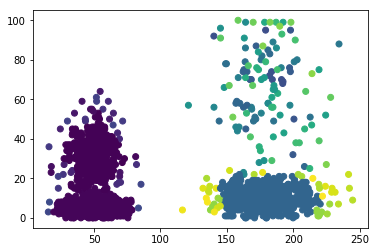

eps: 3
min_sample: 2


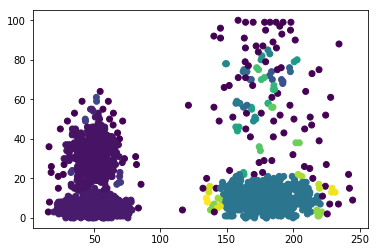

eps: 3
min_sample: 3


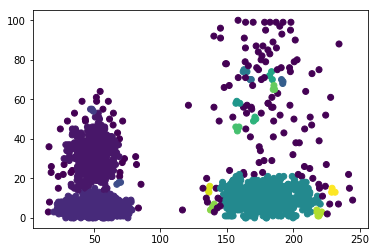

eps: 3
min_sample: 4


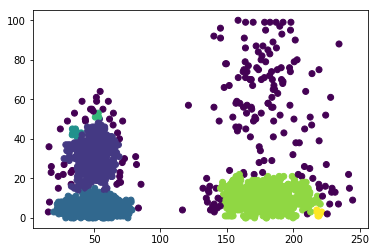

eps: 3
min_sample: 5


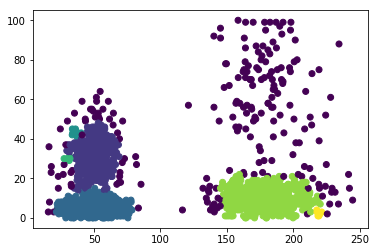

eps: 3
min_sample: 15


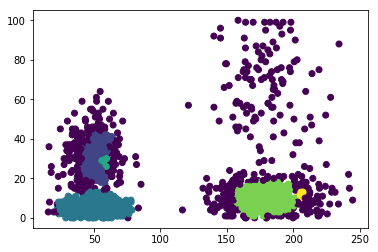

eps: 3
min_sample: 50


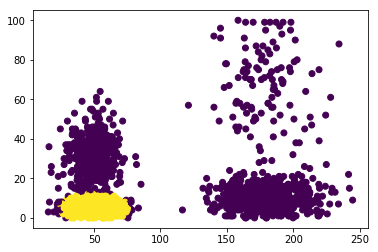

eps: 4
min_sample: 1


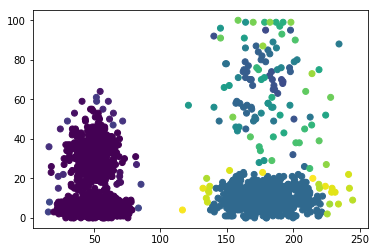

eps: 4
min_sample: 2


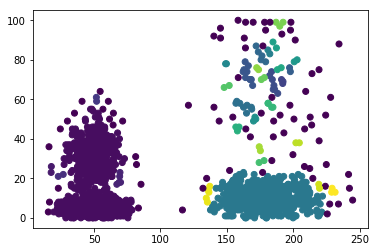

eps: 4
min_sample: 3


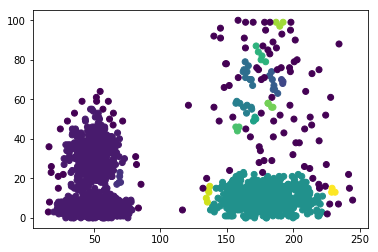

eps: 4
min_sample: 4


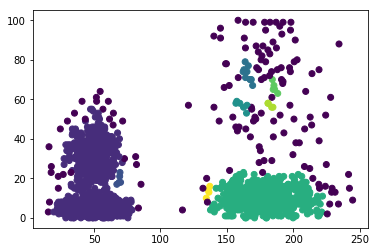

eps: 4
min_sample: 5


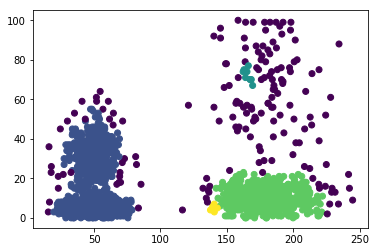

eps: 4
min_sample: 15


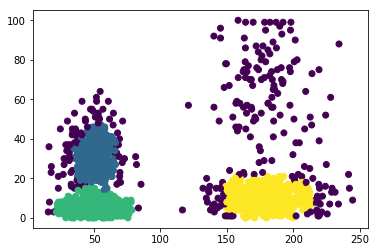

eps: 4
min_sample: 50


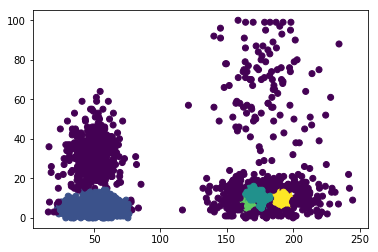

eps: 5
min_sample: 1


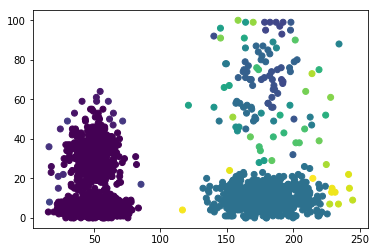

eps: 5
min_sample: 2


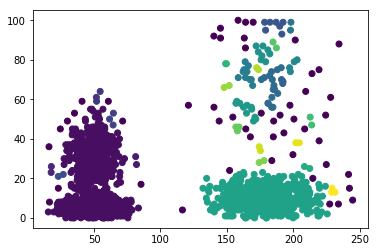

eps: 5
min_sample: 3


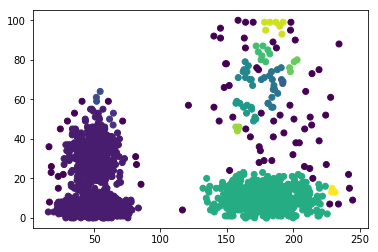

eps: 5
min_sample: 4


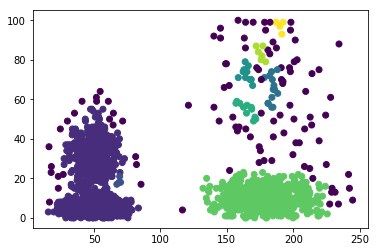

eps: 5
min_sample: 5


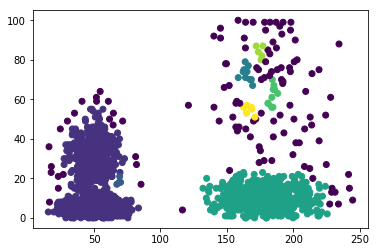

eps: 5
min_sample: 15


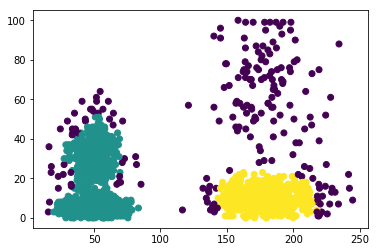

eps: 5
min_sample: 50


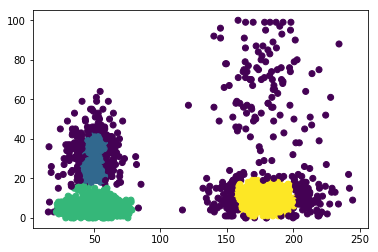

eps: 15
min_sample: 1


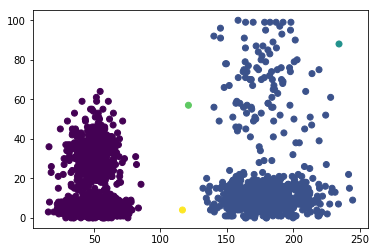

eps: 15
min_sample: 2


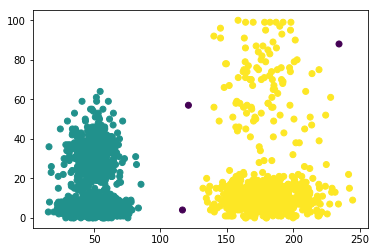

eps: 15
min_sample: 3


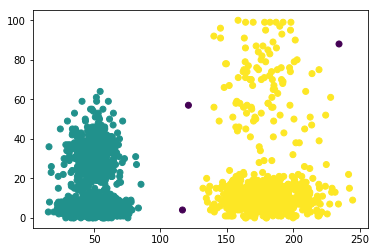

eps: 15
min_sample: 4


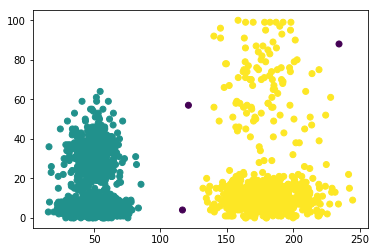

eps: 15
min_sample: 5


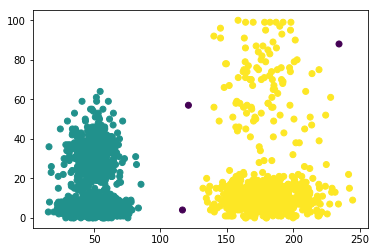

eps: 15
min_sample: 15


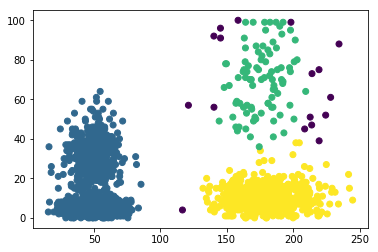

eps: 15
min_sample: 50


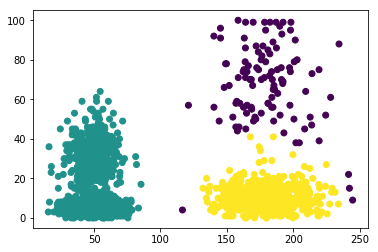

In [13]:
for i in [2,3,4,5,15]:
    for j in [1,2,3,4,5,15,50]:
        db = DBSCAN(eps=i, min_samples=j, metric='euclidean')
        y_db = db.fit_predict(X)
        print("eps: {}\nmin_sample: {}".format(i,j))
        plt.scatter(X.iloc[:,0],X.iloc[:,1],c = y_db)
        plt.show();

## Conceituais
### 1) Feature Selection é usado para selecionar as features com maior importância para um modelo, com isso é possível encontrar e descartar as features que não possuem importância para o modelo. Já a feature extraction é usado para gerar novas features a partir das features existentes.
### 2) Exemplos de técnicas de features selecion são as normas l1, l2 e ElasticNet.
### 3) Exemplos de técnicas de features extraction são o PCA e LDA.



## Questões de PCA e LDA

In [14]:
X,y = load_iris(return_X_y=True)
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## PCA

In [15]:
pca = PCA(n_components=2)
X_= pca.fit_transform(X,y)

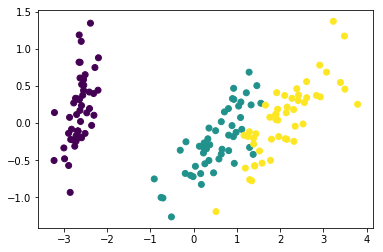

In [16]:
plt.scatter(X_[:,0],X_[:,1],c=y);

## LDA

In [17]:
lda = LDA(n_components=2)
X_= lda.fit_transform(X,y)

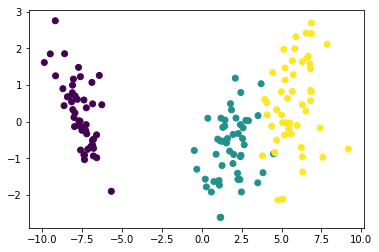

In [18]:
plt.scatter(X_[:,0],X_[:,1],c=y);